# K-prototypes

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from kneed import KneeLocator
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
import numpy as np

In [2]:
FILE_PATH = "../Data/numerical_2.csv"

In [3]:
df = pd.read_csv(FILE_PATH, encoding='utf-8', error_bad_lines=False)

In [4]:
df_proto = df.copy() 

In [5]:
columns = ['brand', 'OS', 'battery_removable', 'battery_type']
encoder = preprocessing.LabelEncoder()
df_encoded = df[columns].apply(encoder.fit_transform)
df = df.drop(columns, axis=1)
df = df.join(df_encoded)

In [6]:
features = ['RAM','approx_price_EUR', 'battery_mah', 'CPU_cores', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp', 'secondary_camera_mp']

In [7]:
x = df[features]

In [8]:
x

,RAM,approx_price_EUR,battery_mah,CPU_cores,CPU_speed,internal_memory_gb,brand,OS,battery_removable,battery_type,primary_camera_mp,secondary_camera_mp
0,2.000,170.0,3400.0,4,1.30,32.0,0,0,0,0,13.0,2.0
1,3.000,250.0,4080.0,8,1.30,32.0,0,0,1,1,13.0,5.0
2,1.000,120.0,2000.0,4,1.25,8.0,0,0,1,0,8.0,2.0
3,3.000,230.0,4020.0,8,1.30,32.0,0,0,1,1,13.0,13.0
4,2.000,200.0,5000.0,4,1.30,16.0,0,0,0,0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,1.000,340.0,1900.0,2,1.50,4.0,56,0,1,0,8.0,1.3
1877,1.000,230.0,1600.0,1,1.00,4.0,56,0,1,0,5.0,0.6
1878,1.000,230.0,4000.0,2,1.20,16.0,56,0,0,0,5.0,2.0
1879,0.512,250.0,3400.0,1,1.40,4.0,56,0,0,0,3.2,0.6


In [9]:
# Función para visualización de clusters #
def plot_clusters(data, clustering_model, dim_reduction, title=None):
    if dim_reduction == True:
        pca = PCA(n_components=2)
        X_r = pca.fit(data).transform(data)
    
    y = clustering_model.labels_
    target_names = []
    for label in y:
        if label not in target_names:
            target_names.append(label)
    plt.figure(figsize=(20, 10))
    lw = 2
    colors = ['black', 'turquoise', 'blue', 'RED', 'green', 'darkorange', 'yellow', 'magenta']

    for color, i, target_name in zip(colors, target_names, target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.4, lw=lw, label=target_name)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.show()

In [10]:
#Función para obtener el número optimo de clusters utilizando el método del codo#
def elbow_method(data, cluster_number, clustering_function):
    sse = []
    for k in range(1, cluster_number):
        model = clustering_function(data, k)
        sse.append(model.inertia_)
    
    kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(1, cluster_number), sse)
    plt.xticks(range(1, cluster_number))
    plt.xlabel("Número de clusters")
    plt.ylabel("SSE")
    plt.show()
    
    return kl.elbow

In [11]:
# Función para evaluar los clusters creados mediante silhouette coefficient #
def plot_silhouette_coefficient(data, cluster_number):
    silhouette_coefficients = []
    for k in range(2,cluster_number):
        model = kmeans_clustering(data, k)
        score = silhouette_score(data, model.labels_)
        silhouette_coefficients.append(score)
    
    plt.style.use("fivethirtyeight")
    plt.plot(range(2, cluster_number), silhouette_coefficients)
    plt.xticks(range(2, cluster_number))
    plt.xlabel("Numero de clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()

In [12]:
def kprototype_clustering(data, k, categorical_features):
    kprototypes = KPrototypes(n_clusters=k, init='Cao')
    kprototypes.fit(x, categorical=categorical_features)
    return kprototypes
    

In [13]:
def dissimilarity(a, b):
    print(a)
    print(b)
    match = np.sum(a != b, axis=1)
    num = np.sum((a - b) ** 2, axis=1)
    return [match+num]

In [14]:
#Función para obtener el valor de silhouette coefficient de un modelo #
def silhouette_coefficient(data, clustering_model):
    return silhouette_score(data, clustering_model.labels_).round(4)

In [15]:
categorical_features = [6,7,8,9]

In [16]:
x = x.values

In [17]:
model = kprototype_clustering(data=x, k=4, categorical_features=categorical_features)

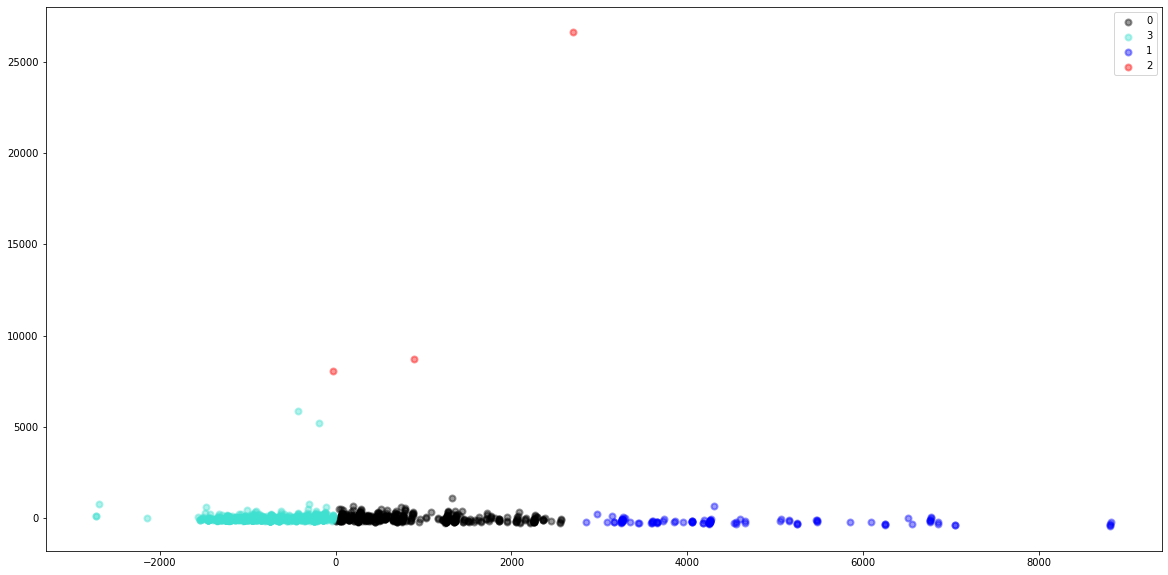

In [18]:
plot_clusters(data=x, clustering_model=model, dim_reduction=True, title=None)

In [19]:
silhouette_coefficient(data=x, clustering_model=model)

0.5914

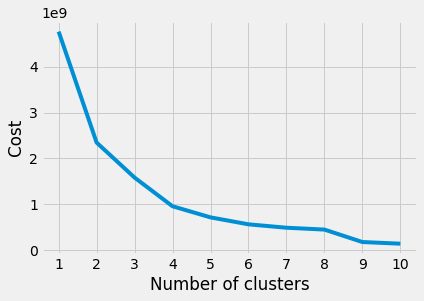

In [20]:
sse = []
cluster_number = 11
for k in range(1, cluster_number):
    model = kprototype_clustering(data=x, k=k, categorical_features=categorical_features)
    sse.append(model.cost_)
    
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, cluster_number), sse)
plt.xticks(range(1, cluster_number))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()

In [21]:
kl.elbow

4

## Experimento 2

In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
df_proto

,brand,model,OS,RAM,approx_price_EUR,battery_removable,battery_type,battery_mah,CPU_cores,CPU_speed,primary_camera_mp,secondary_camera_mp,internal_memory_gb
0,Acer,Iconia Talk S,Android,2.000,170.0,False,Li-Ion,3400.0,4,1.30,13.0,2.0,32.0
1,Acer,Liquid Z6 Plus,Android,3.000,250.0,True,Li-Po,4080.0,8,1.30,13.0,5.0,32.0
2,Acer,Liquid Z6,Android,1.000,120.0,True,Li-Ion,2000.0,4,1.25,8.0,2.0,8.0
3,Acer,Liquid X2,Android,3.000,230.0,True,Li-Po,4020.0,8,1.30,13.0,13.0,32.0
4,Acer,Liquid Zest Plus,Android,2.000,200.0,False,Li-Ion,5000.0,4,1.30,13.0,5.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,ZTE,Grand X LTE T82,Android,1.000,340.0,True,Li-Ion,1900.0,2,1.50,8.0,1.3,4.0
1877,ZTE,Grand X V970,Android,1.000,230.0,True,Li-Ion,1600.0,1,1.00,5.0,0.6,4.0
1878,ZTE,Optik,Android,1.000,230.0,False,Li-Ion,4000.0,2,1.20,5.0,2.0,16.0
1879,ZTE,Light Tab 2 V9A,Android,0.512,250.0,False,Li-Ion,3400.0,1,1.40,3.2,0.6,4.0


In [24]:
features = ['RAM','approx_price_EUR', 'battery_mah', 'CPU_cores', 'CPU_speed',
            'internal_memory_gb', 'brand', 'OS', 'battery_removable','battery_type', 'primary_camera_mp', 'secondary_camera_mp']

In [25]:
x = df_proto[features]

In [26]:
for c in x.select_dtypes(exclude='object').columns:
    pt = StandardScaler()
    x[c] =  pt.fit_transform(np.array(x[c]).reshape(-1, 1))

/home/german/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/german/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/german/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is tryin

In [27]:
columns = ['brand', 'OS', 'battery_type']
encoder = preprocessing.LabelEncoder()
df_encoded = x[columns].apply(encoder.fit_transform)
x = x.drop(columns, axis=1)

In [28]:
x = x.join(df_encoded)

In [29]:
categorical_columns = [6,9,10,11]

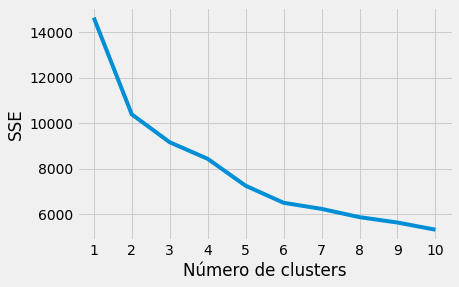

In [30]:
sse = []
cluster_number = 11
for k in range(1, cluster_number):
    model = kprototype_clustering(data=x, k=k, categorical_features=categorical_features)
    sse.append(model.cost_)
    
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, cluster_number), sse)
plt.xticks(range(1, cluster_number))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [31]:
kl.elbow

5

In [32]:
kproto = KPrototypes(n_clusters= kl.elbow, init='Cao', n_jobs = 4)
kproto.fit(x, categorical=categorical_columns)

KPrototypes(gamma=0.49999999999999994, init='Cao', n_clusters=5, n_jobs=4)

In [33]:
silhouette_coefficient(data=x, clustering_model=kproto)

0.0217

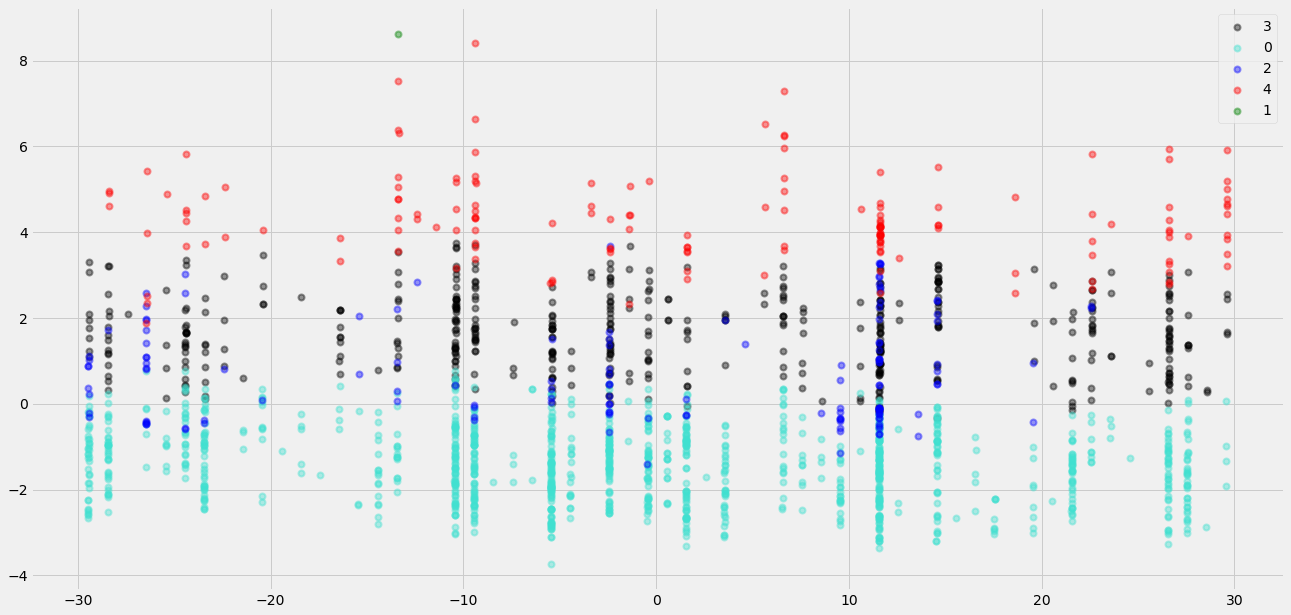

In [34]:
plot_clusters(data=x, clustering_model=kproto, dim_reduction=True, title=None)